In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("default of credit card clients.csv")

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,530,20000,2,2,2,21,-1,-1,2,2,...,362,5308,0,14410,0,28,22073,0,0,0
1,1225,20000,1,2,2,21,0,0,-1,0,...,1300,0,0,1240,2333,0,0,0,0,0
2,1472,20000,1,2,2,21,0,0,2,0,...,20000,0,0,5000,0,0,0,0,0,1
3,2207,20000,2,1,2,21,0,0,0,0,...,9429,1393,2055,1400,3500,1567,162,2055,0,0
4,2213,10000,1,2,2,21,0,0,0,0,...,8880,9580,9000,1217,1000,200,700,200,0,0


In [5]:
results = data.default_payment_next_month
results.head()

0    0
1    0
2    1
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [6]:
variables = data.drop('default_payment_next_month', axis = 1)
variables.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,530,20000,2,2,2,21,-1,-1,2,2,...,13771,362,5308,0,14410,0,28,22073,0,0
1,1225,20000,1,2,2,21,0,0,-1,0,...,2333,1300,0,0,1240,2333,0,0,0,0
2,1472,20000,1,2,2,21,0,0,2,0,...,20200,20000,0,0,5000,0,0,0,0,0
3,2207,20000,2,1,2,21,0,0,0,0,...,13937,9429,1393,2055,1400,3500,1567,162,2055,0
4,2213,10000,1,2,2,21,0,0,0,0,...,9070,8880,9580,9000,1217,1000,200,700,200,0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(variables, results, random_state = 24)

In [77]:
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=24, splitter='best')

In [78]:
def test_accuracy_report(model):
    y_pred = model.predict(X_test)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))

In [79]:
training_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print('Training score: ', training_score)
print('Test score: ', test_score)

Training score:  1.0
Test score:  0.7237333333333333


In [95]:
rf = RandomForestClassifier(criterion='gini',n_estimators = 75, random_state=24)
rf.fit(X_train, y_train)
test_accuracy_report(rf)

Accuracy score:  0.8145333333333333


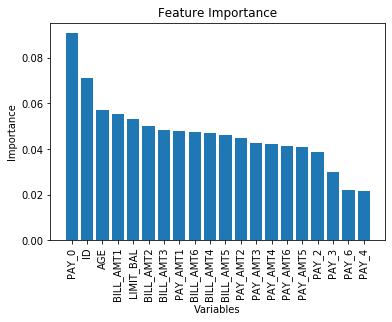

In [83]:
# Calculate feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [variables.columns[i] for i in indices]

# Create plot
fig = plt.figure()

# Create plot title
plt.title("Feature Importance")
x = 20
# Add bars
plt.bar(range(x), importances[indices][:x])

# Add feature names as x-axis labels
plt.xticks(range(x), names[:x], rotation=90)

plt.xlabel('Variables')
plt.ylabel('Importance')
# Show plot
plt.show()
# fig.savefig('plot.png', bbox_inches = 'tight', transparent = True) # Save file as plot.png

In [85]:
# Rohit Code
text_clf = Pipeline([
    ('vect', TfidfVectorizer(ngram_range = (1, 2))),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=30, max_depth=40, min_samples_split=2, min_samples_leaf=2)),
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print("Model accuracy is",accuracy_score(y_test, predicted))

x_increments = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)

train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=42, n_estimators=30, max_depth=40, min_samples_split=2), X_train_tfidf, y_train, "min_samples_leaf", x_increments , cv=5)

for x,i in enumerate(train_scores):
    train_scores[x] = np.mean(i)

for x,i in enumerate(valid_scores):
    valid_scores[x] = np.mean(i)

print(train_scores)
print(valid_scores)
plt.plot(x_increments, train_scores, label='train')

plt.plot(x_increments, valid_scores, label='valid')
plt.legend()
plt.savefig('ValidCurve.png')

parameters = {
    'vectngram_range': [(1, 1), (1, 2), (1, 3)],
    'clfn_estimators': (650, 700, 750, 800, 850, 900),
    'clfmax_depth': (15, 20, 25),
    'clfmin_samples_split': (5, 10, 15, 20),
    'clf__min_samples_leaf': (2, 3),
}

""" gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1, verbose=1)
gs_clf = gs_clf.fit(X_train, y_train)
print(gs_clf.bestscore)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.bestparams[param_name])) """

NameError: name 'GridSearchCV' is not defined

In [98]:
parameters = {
    'n_estimators': (60, 90, 120),
    'max_depth': (15, 20, 25),
    'min_samples_split': (5, 10, 15, 20),
    'min_samples_leaf': (2, 3),
}

In [102]:
gs_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=1)
gs_clf = gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.0min finished


In [104]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))
print(gs_clf.best_score_)

max_depth: 15
min_samples_leaf: 3
min_samples_split: 20
n_estimators: 60
0.8196888888888889


In [7]:
ages = data.AGE
print(ages)
dfl = data.default_payment_next_month
print(dfl)

0        21
1        21
2        21
3        21
4        21
         ..
29995    74
29996    75
29997    75
29998    75
29999    79
Name: AGE, Length: 30000, dtype: int64
0        0
1        0
2        1
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    0
29999    0
Name: default_payment_next_month, Length: 30000, dtype: int64


In [8]:
# Initializing range x-values
twentiesX = []
thirtiesX = []
fortiesX = []
fiftiesX = []
sixtiesX = []
seventiesX = []
# Initializing range y-values
twentiesY = []
thirtiesY = []
fortiesY = []
fiftiesY = []
sixtiesY = []
seventiesY = []
# Setting default counter
count20 = 0
count30 = 0
count40 = 0
count50 = 0
count60 = 0
count70 = 0
# More epic initialization
countD20 = 0
countD30 = 0
countD40 = 0
countD50 = 0
countD60 = 0
countD70 = 0

# Default? Y/N

for index in range(30000):
    if ages[index] < 30:
#        print('20 to 29:', ages[index])
        twentiesX = np.append(twentiesX, ages[index])
        count20 = count20 + 1
        if dfl[index] == 1:
            countD20 = countD20 + 1
        
    elif ages[index] < 40:
#        print('30 to 39:', ages[index])
        thirtiesX = np.append(thirtiesX, ages[index])
#        thirtiesY = np.append(thirtiesY, dfl[index])
        count30 = count30 + 1
        if dfl[index] == 1:
            countD30 = countD30 + 1
        
    elif ages[index] < 50:
#        print('40 to 49:', ages[index])
        fortiesX = np.append(fortiesX, ages[index])
#        fortiesY = np.append(fortiesY, dfl[index])
        count40 = count40 + 1
        if dfl[index] == 1:
            countD40 = countD40 + 1
        
    elif ages[index] < 60:
#        print('50 to 59:', ages[index])
        fiftiesX = np.append(fiftiesX, ages[index])
#        fiftiesY = np.append(fiftiesY, dfl[index])
        count50 = count50 + 1
        if dfl[index] == 1:
            countD50 = countD50 + 1
        
    elif ages[index] < 70:
#        print('60 to 69:', ages[index])
        sixtiesX = np.append(sixtiesX, ages[index])
#        sixtiesY = np.append(sixtiesY, dfl[index])
        count60 = count60 + 1
        if dfl[index] == 1:
            countD60 = countD60 + 1
        
    else: 
#        print('70 to 79:', ages[index])
        seventiesX = np.append(seventiesX, ages[index])
#        seventiesY = np.append(seventiesY, dfl[index])
        count70 = count70 + 1
        if dfl[index] == 1:
            countD70 = countD70 + 1
    
print(count20)
print(count30)
print(count40)
print(count50)
print(count60)
print(count70)


9618
11238
6464
2341
314
25


([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([ 0.38910506,  8.25019455, 16.11128405, 23.97237354, 31.83346304,
        39.69455253, 47.55564202, 55.41673152, 63.27782101, 71.13891051,
        79.        ]),
 <a list of 2 Lists of Patches objects>)

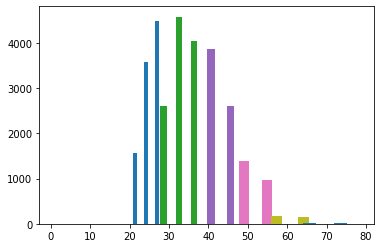

In [9]:
twentiesX1 = 0
thirtiesX1 = 0
fortiesX1 = 0
fiftiesX1 = 0 
sixtiesX1 = 0
seventiesX1 = 0

for index in range(len(twentiesX)):
    twentiesX1 = twentiesX1 + twentiesX[index]
avg20 = (countD20 / twentiesX1) * 100

for index in range(len(thirtiesX)):
    thirtiesX1 = thirtiesX1 + thirtiesX[index]
avg30 = (countD30 / thirtiesX1) * 100

for index in range(len(fortiesX)):
    fortiesX1 = fortiesX1 + fortiesX[index]
avg40 = (countD40 / fortiesX1) * 100

for index in range(len(fiftiesX)):
    fiftiesX1 = fiftiesX1 + fiftiesX[index]
avg50 = (countD50 / fiftiesX1) * 100

for index in range(len(sixtiesX)):
    sixtiesX1 = sixtiesX1 + sixtiesX[index]
avg60 = (countD60 / sixtiesX1) * 100

for index in range(len(seventiesX)):
    seventiesX1 = seventiesX1 + seventiesX[index]
avg70 = (countD70 / seventiesX1) * 100

plt.hist([twentiesX, avg20])
plt.hist([thirtiesX, avg30])
plt.hist([fortiesX, avg40])
plt.hist([fiftiesX, avg50])
plt.hist([sixtiesX, avg60])
plt.hist([seventiesX, avg70])